In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab2.ipynb")

![](img/571_lab_banner.png)

# Lab 2: Preprocessing

<br><br>

## Imports 

In [1]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert-warning">
    
## Instructions  
rubric={mechanics}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Read the **[Use of Generative AI Policy](https://ubc-mds.github.io/policies/)**.
  
- Review the **[General Lab Instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/)**.
    
- Check the **[MDS Rubrics](https://github.com/UBC-MDS/public/tree/master/rubric)** for grading criteria.

### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.
    
- **Include a clickable link to your GitHub repository** below this cell.

- Make at least 3 commits to your GitHub repository and ensure it's up to date. If Gradescope becomes inaccessible, we'll grade the most recent GitHub version submitted before the deadline.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  



### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Points:_ 4

YOUR REPO LINK GOES HERE

<!-- END QUESTION -->

<br><br>

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a medium-sized dataset which has different types of features. 

<br><br>

## Exercise 1: Dataset and preliminary EDA
<hr>


In this lab, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` under the data folder in this lab folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` under the data folder). 

>  ⚠️  _Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [2]:
census_df = pd.read_csv("data/adult.csv")
census_df.shape

(32561, 15)

<br><br>

<div class="alert alert-info">
    
### 1.1 Data splitting 
rubric={autograde}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

1. Split the data into `train_df` (40%) and `test_df` (60%) with `random_state = 123`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

> ⚠️ Usually, having more data for training is a good idea. But in this lab we'll be using 40%/60% split because running cross-validation with this dataset can take a long time on a modest laptop. A smaller training data means it will be a bit faster to train the model on your laptop. A side advantage of this is that with a bigger test split, we'll have a more reliable estimate of the model performance!

</div>

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

In [3]:
train_df = None
test_df = None

# BEGIN SOLUTION

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(census_df, test_size=0.6, random_state=123)

# END SOLUTION

In [ ]:
grader.check("q1.1")

<br><br>

Let's examine our `train_df`. 

In [5]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values because they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [6]:
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)
train_df.shape

(13024, 15)

In [7]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

<div class="alert alert-info">
    
### 1.2 `describe()` method
rubric={autograde}

The table below shows the output of `train_df.describe(include='all')`, which summarizes both numeric and categorical features.

**Your tasks:**

1. What are the highest hours per week someone reported? Store it in a variable called `max_hours_per_week`.
2. What is the most frequently occurring occupation in this dataset? Store it in a variable called `most_freq_occupation`.
3. Store the column names of the columns with missing values as a list in a variable called `missing_vals_cols`. 
4. Store the column names of all numeric-looking columns, irrespective of whether you want to include them in your model or not, as a list in a variable called `numeric_cols`.

</div>

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 4

In [8]:
census_summary = train_df.describe(include="all")
census_summary

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,13024.000000,12284,1.302400e+04,13024,13024.000000,13024,12281,13024,13024,13024,13024.000000,13024.000000,13024.000000,12783,13024
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,9123,NaN,4153,NaN,5936,1649,5195,11158,8700,NaN,NaN,NaN,11717,9875
mean,38.546913,NaN,1.884759e+05,NaN,10.057432,NaN,NaN,NaN,NaN,NaN,1079.831695,86.543074,40.395654,NaN,NaN
std,13.610225,NaN,1.040895e+05,NaN,2.553084,NaN,NaN,NaN,NaN,NaN,7322.034546,403.025863,12.285347,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.170962e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778990e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.365655e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
max_hours_per_week = None # 1.2.1

# BEGIN SOLUTION
max_hours_per_week = census_summary.loc['max']['hours.per.week']
max_hours_per_week
# END SOLUTION

np.float64(99.0)

In [10]:
most_freq_occupation = None # 1.2.2

# BEGIN SOLUTION
most_freq_occupation = census_summary.loc['top']['occupation']
most_freq_occupation
# END SOLUTION

'Prof-specialty'

In [11]:
# BEGIN SOLUTION
train_df.info()
# END SOLUTION

<class 'pandas.core.frame.DataFrame'>
Index: 13024 entries, 5917 to 19966
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             13024 non-null  int64 
 1   workclass       12284 non-null  object
 2   fnlwgt          13024 non-null  int64 
 3   education       13024 non-null  object
 4   education.num   13024 non-null  int64 
 5   marital.status  13024 non-null  object
 6   occupation      12281 non-null  object
 7   relationship    13024 non-null  object
 8   race            13024 non-null  object
 9   sex             13024 non-null  object
 10  capital.gain    13024 non-null  int64 
 11  capital.loss    13024 non-null  int64 
 12  hours.per.week  13024 non-null  int64 
 13  native.country  12783 non-null  object
 14  income          13024 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.1+ MB


In [12]:
missing_vals_cols = None # 1.2.3
numeric_cols = None # 1.2.4

# BEGIN SOLUTION

missing_vals_cols = ['workclass', 'occupation', 'native.country']
numeric_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# END SOLUTION

In [13]:
# Sorting the lists for the autograder
missing_vals_cols.sort()
numeric_cols.sort()

In [ ]:
grader.check("q1.2")

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 1.3 Visualizing features
rubric={viz,reasoning}

**Your tasks:**

1. For each numeric feature listed in `numeric_cols`, generate overlapping histograms showing the distributions for the <=50K and >50K income classes, similar to how you did it in Lab 1. You may use any visualization library of your choice.
   
2. Write a brief summary (1 to 2 sentences) of your preliminary observations based on these histograms.

> ⚠️ If you use `Altair`, note that column names containing periods (e.g., `capital.gain`, `capital.loss`) have a special meaning in `Altair`. They indicate nested data structures such as JSON fields. To avoid errors, consider renaming these columns (e.g., replacing . with _)

</div>

<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

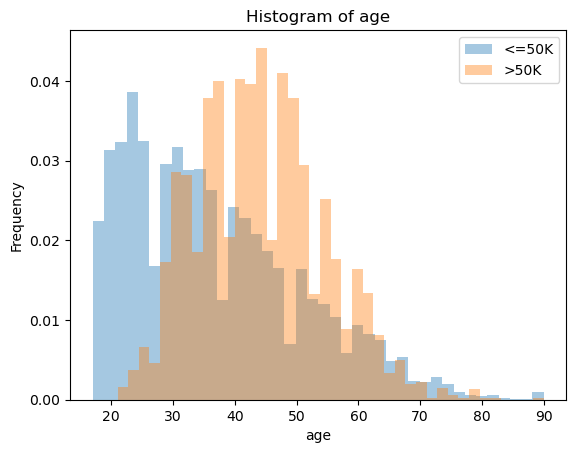

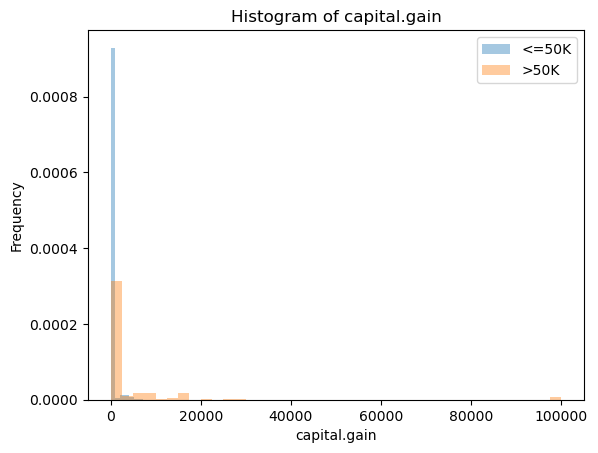

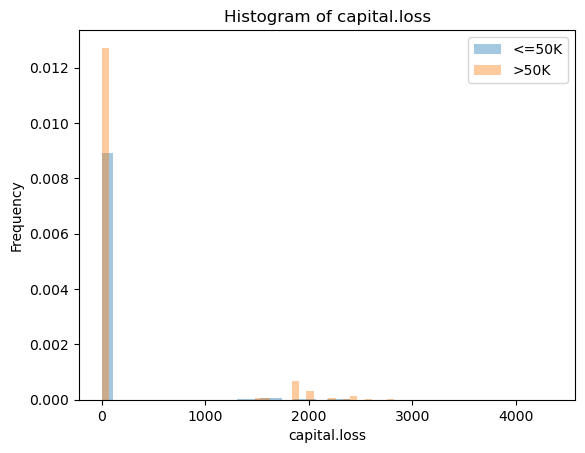

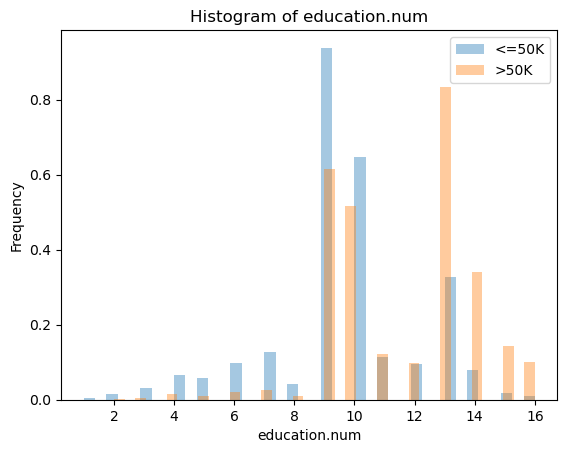

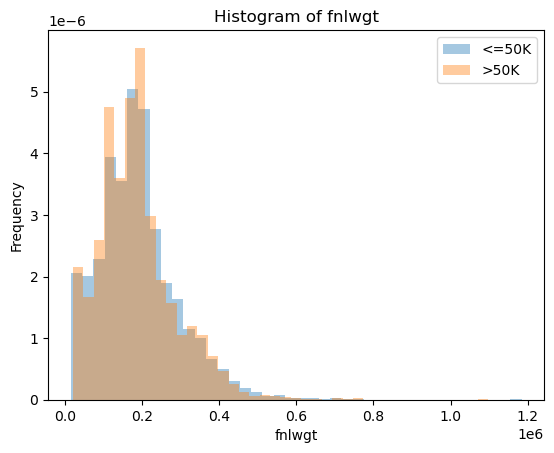

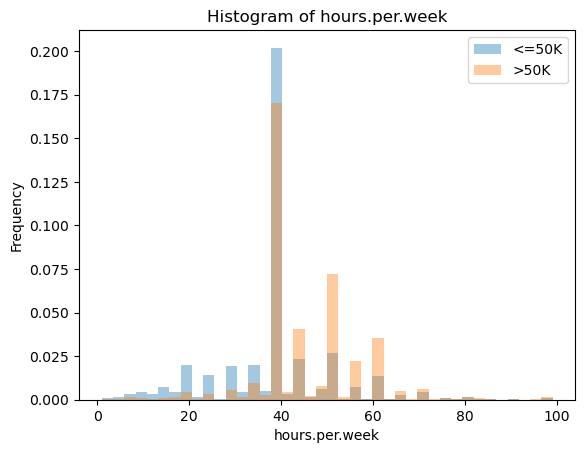

In [18]:
# BEGIN SOLUTION
for feat in numeric_cols:
    ax = train_df.groupby("income")[feat].plot.hist(bins=40, alpha=0.4, legend=True, density=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()
# END SOLUTION

**Preliminary observations**: 
From the density histograms above it seems like middle age, higher capital.gain, higher capital.loss, higher education.num and more work hours.per.week are associated with higher income (>50K income). 

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: Identifying different feature types and transformations  
<hr>

Typically, data isn't readily formatted for direct input into machine learning models. It's crucial for a machine learning practitioner to examine each column and determine an effective method for encoding its information. Let's determine the types of features we have and come up with suitable encoding strategies for them. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.1 Identify transformations to apply
rubric={reasoning}

Before passing this data to a machine learning model, we need to apply some transformations on different features. Below we are providing possible transformations which can be applied on each column in `census_df`.  

**Your tasks:**
1. Write your justification or explanation for each row in the explanation column. Some example explanations are given below. 

> ⚠️ This question is a bit open-ended. If you do not agree with the provided transformation, feel free to argue your case in the explanation. That said, in this assignment, go with the transformations provided below for the purpose of autograding. 

> You can find the information about the columns [here](http://archive.ics.uci.edu/ml/datasets/Adult).

</div>

<div class="alert alert-warning">

Solution_2.1
    
</div>

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| age | scaling with `StandardScaler` |  A numeric feature with no missing values, ranging from 17 to 90. Scaling is recommended due to its distinct range compared to other numeric features. While MinMaxScaler might be more suitable, using StandardScaler should be fine too.|
| workclass | imputation, one-hot encoding | |
| fnlwgt | drop |  The column represents the weight assigned by the US census bureau to each row. This is not really a feature which is relevant to predict the income |
| education | ordinal encoding | |
| education.num | drop | |
| marital.status | one-hot encoding  | |
| occupation | imputation, one-hot encoding  | Categorical column with missing values |
| relationship | one-hot encoding  | |
| race | drop  |  |
| sex | one-hot encoding with `drop = if_binary` | |
| capital.gain | scaling with `StandardScaler` |  | 
| capital.loss | scaling with `StandardScaler` | numeric feature with no missing values |
| hours.per.week | scaling with `StandardScaler` | |
| native.country | imputation, one-hot encoding | | 


_Points:_ 10

_Type your answer here, replacing this text._

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| age | scaling |  A numeric feature with no missing values, ranging from 17 to 90. Scaling is recommended due to its distinct range compared to other numeric features. While MinMaxScaler might be more suitable, using StandardScaler should be fine too.|
| workclass | imputation, one-hot encoding | categorical variable with XX categories, some missing values|
| fnlwgt | drop | The column represents the weight assigned by the US census bureau to each row. This is not really a feature which is relevant to predict the income |
| education | ordinal encoding | The column has a number of education levels which have some ordering associated with them. For example, "Bachelors" < "Masters"|
| education.num | drop | duplicate column |
| marital.status | one-hot encoding  | Categorical column with no missing values |
| occupation | imputation, one-hot encoding  | Categorical column with missing values |
| relationship | one-hot encoding  | Categorical column with no missing values |
| race | drop  | Categorical column with no missing values. It might not be a good idea to include the race feature to predict income. Such systems get used in applications which can affect real people. For example, this prediction might be used in deciding whether to approve a loan application or not. Influencing this decision by race feature might harm people belonging to certain race.   |
| sex | one-hot encoding with `drop = if_binary` | Although sex in general is not binary, in this dataset, there are only two possible values for this feature and that's why we are treating it as a binary feature and applying one-hot encoding with `drop = if_binary`. So only one column will be created for the feature. |
| capital.gain | scaling | numeric feature with no missing values | 
| capital.loss | scaling | numeric feature with no missing values |
| hours.per.week | scaling | numeric feature with no missing values |
| native.country | imputation, one-hot encoding | categorical feature with missing values.| 

<!-- END QUESTION -->

<br><br>

<div class="alert alert-info">
    
### 2.2 Identify feature types
rubric={autograde}


**Your tasks:**
1. Based on the types of transformations we want to apply on the features above, identify different feature types and store them in the variables below as lists.

</div>

<div class="alert alert-warning">
    
Solution_2.2
    
</div>

_Points:_ 5

In [19]:
# Fill in the lists below.
numeric_features = []
categorical_features = []
ordinal_features = []
binary_features = []
drop_features = []
target = "income"

# BEGIN SOLUTION

numeric_features = ["capital.gain", "age", "capital.loss","hours.per.week"]
categorical_features = ["marital.status", "native.country", "relationship", "occupation", "workclass"]
ordinal_features = ["education"]
binary_features = ["sex"]
drop_features = ["fnlwgt", "race", "education.num"]

# END SOLUTION

In [20]:
# Sorting all the lists above for the autograder
numeric_features.sort()
categorical_features.sort()
ordinal_features.sort()
binary_features.sort()
drop_features.sort()

In [ ]:
grader.check("q2.2")

<br><br><br><br>

## Exercise 3: Baseline model

<div class="alert alert-info">
    
### 3.1 Separating feature vectors and targets  
rubric={autograde}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df` and `test_df`.

</div>

<div class="alert alert-warning">
    
Solution_3.1
    
</div>

_Points:_ 1

In [22]:
X_train = None
y_train = None
X_test = None
y_test = None

# BEGIN SOLUTION
X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_test = test_df.drop(columns=[target])
y_test = test_df[target]
# END SOLUTION

In [ ]:
grader.check("q3.1")

<br><br>

<div class="alert alert-info">
    
### 3.2 Dummy classifier
rubric={autograde}

**Your tasks:**

1. Carry out 5-fold cross-validation using [`scikit-learn`'s `cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function with `return_train_score=True` and store the results as a dataframe named `dummy_df` where each row corresponds to the results from a cross-validation fold.

</div>

<div class="alert alert-warning">
    
Solution_3.2
    
</div>

_Points:_ 1

In [24]:
dummy_df = None 

# BEGIN SOLUTION
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

dummy = DummyClassifier()
scores = cross_validate(dummy, X_train, y_train, return_train_score=True)
dummy_df = pd.DataFrame(scores)
dummy_df
# END SOLUTION

,fit_time,score_time,test_score,train_score
0,0.004516,0.002134,0.758157,0.758230
1,0.003826,0.001943,0.758157,0.758230
2,0.003689,0.001863,0.758157,0.758230
3,0.003731,0.001937,0.758157,0.758230
4,0.003646,0.001914,0.758449,0.758157


In [ ]:
grader.check("q3.2")

<br><br><br><br>

## Exercise 4: Column transformer 
<hr>

In this dataset, we have different types of features: numeric features, an ordinal feature, categorical features, and a binary feature. We want to apply different transformations on different columns and therefore we need a column transformer. First, we'll define different transformations on different types of features and then will create a `scikit-learn`'s `ColumnTransformer` using `make_column_transformer`. For example, the code below creates a `numeric_transformer` for numeric features. 

In [26]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()

In the exercises below, you'll create transformers for other types of features. 

<br><br>

<div class="alert alert-info">
    
### 4.1 Preprocessing ordinal features
rubric={autograde}

**Your tasks:**

1. Create a transformer called `ordinal_transformer` for our ordinal features. 

> ⚠️ Note that you need to provide an ordered list of categories when defining your `OrdinalEncoder`. The correct order for education levels isn't obvious, so for this exercise, assume the following order: "HS-grad" < "Prof-school" < "Assoc-voc" < "Assoc-acdm" < "Some-college" < "Bachelors"

</div>

<div class="alert alert-warning">
    
Solution_4.1
    
</div>

_Points:_ 5

In [27]:
ordinal_transformer = None

# BEGIN SOLUTION
train_df["education"].unique()
# END SOLUTION

array(['Bachelors', 'Some-college', '11th', 'HS-grad', 'Assoc-acdm',
       '9th', 'Masters', 'Doctorate', '1st-4th', '7th-8th', 'Assoc-voc',
       '10th', '5th-6th', 'Preschool', 'Prof-school', '12th'],
      dtype=object)

In [28]:
# BEGIN SOLUTION
education_levels = [
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Prof-school",
    "Assoc-voc",
    "Assoc-acdm",
    "Some-college",
    "Bachelors",
    "Masters",
    "Doctorate",
]
assert set(education_levels) == set(train_df["education"].unique())
# END SOLUTION

In [29]:
# BEGIN SOLUTION
from sklearn.preprocessing import OrdinalEncoder

ordinal_transformer = OrdinalEncoder(categories=[education_levels], dtype=int)
# END SOLUTION

In [ ]:
grader.check("q4.1")

<br><br>

Now we'll create a transformer called `binary_transformer` for our binary features to encode binary features as integers 0 and 1.

> ⚠️ _Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._


In [31]:
binary_transformer = None
from sklearn.preprocessing import OneHotEncoder
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)

<br><br>

<div class="alert alert-info">
    
### 4.2 Preprocessing categorical features
rubric={autograde}

There are a few categorical features with missing values in our dataset. Our initial step is to impute these missing values before proceeding to one-hot encode the features. For this assignment, apply imputation to all categorical features, regardless of whether they have missing values. If a feature lacks missing values, the imputation step will have no effect.

If we want to apply more than one transformation on a set of features, we need to create a [`scikit-learn` `Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). For example, for categorical features we can create a `scikit-learn` `Pipeline` with first step as imputation and the second step as one-hot encoding. 

**Your tasks:**

1. Create a `sklearn` `Pipeline` using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) called `categorical_transformer` for our categorical features with two steps:
- `SimpleImputer` for imputation with `strategy="constant"` and `fill_value="missing"`
- `OneHotEncoder` with `handle_unknown="ignore"` and `sparse_output=False` for one-hot encoding.

</div>

<div class="alert alert-warning">
    
Solution_4.2
    
</div>

_Points:_ 4

In [32]:
categorical_transformer = None

# BEGIN SOLUTION
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)
# END SOLUTION

In [ ]:
grader.check("q4.2")

<br><br>

<div class="alert alert-info">
    
### 4.3 Creating a column transformer. 
rubric={autograde}

Now we're ready to combine the different transformers using a `ColumnTransformer`.

**Your tasks:**
1. Create a `sklearn` `ColumnTransformer` named `preprocessor` using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) with the transformers defined in the previous exercises. Use the sequence below in the column transformer and add a "drop" step for the `drop_features` in the end.  
    - `numeric_transformer`
    - `ordinal_transformer`
    - `binary_transformer`
    - `categorical_transformer`
2. Transform the data by calling `fit_transform` on the training set and save it as a dataframe in a variable called `transformed_df`. How many new columns have been created in the preprocessed data in comparison to the original `X_train`? Store the difference between the number of columns in `transformed_df` and `X_train` in a variable called `n_new_cols`. 

> You are not required to do this but optionally you can try to get column names of the transformed data and create the dataframe `transformed_df` with proper column names.

</div>

<div class="alert alert-warning">
    
Solution_4.3
    
</div>

_Points:_ 7

In [34]:
preprocessor = None

# BEGIN SOLUTION
from sklearn.compose import make_column_transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),    
    (binary_transformer, binary_features),    
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)
# END SOLUTION

In [35]:
transformed_df = None
n_new_cols = None

# BEGIN SOLUTION
preprocessed_X_train = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()
transformed_df = pd.DataFrame(preprocessed_X_train, columns=feature_names)
n_new_cols = transformed_df.shape[1] - X_train.shape[1]
# END SOLUTION

In [36]:
transformed_df

,standardscaler__age,standardscaler__capital.gain,standardscaler__capital.loss,standardscaler__hours.per.week,ordinalencoder__education,onehotencoder__sex_Male,pipeline__marital.status_Divorced,pipeline__marital.status_Married-AF-spouse,pipeline__marital.status_Married-civ-spouse,pipeline__marital.status_Married-spouse-absent,...,pipeline__relationship_Wife,pipeline__workclass_Federal-gov,pipeline__workclass_Local-gov,pipeline__workclass_Never-worked,pipeline__workclass_Private,pipeline__workclass_Self-emp-inc,pipeline__workclass_Self-emp-not-inc,pipeline__workclass_State-gov,pipeline__workclass_Without-pay,pipeline__workclass_missing
0,-0.921909,-0.147483,-0.214742,0.781802,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.436248,-0.147483,-0.214742,-2.148630,12.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.848432,-0.147483,-0.214742,-0.032207,6.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.768061,-0.147483,-0.214742,-0.032207,12.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.436248,-0.147483,-0.214742,-0.439211,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13019,0.694584,-0.147483,-0.214742,0.781802,8.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13020,-0.260617,-0.147483,-0.214742,-0.195008,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13021,-0.921909,-0.147483,-0.214742,0.130595,12.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13022,-0.774955,-0.147483,-0.214742,-0.032207,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
n_new_cols

70

In [ ]:
grader.check("q4.3")

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 4.4 Short answer questions
rubric={reasoning}

**Your tasks:**

Answer each of the following questions in 2 to 3 sentences. 

1. What is the problem with calling `fit_transform` on your test data with `StandardScaler`?
2. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?
3. When is it appropriate to use sklearn `ColumnTransformer`?

</div>

<div class="alert alert-warning">
    
Solution_4.4
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

1. If you called `fit_transform` on your test data, the scaler will fit using the statistics of the test data. This will cause data leakage issue and break the golden rule in machine learning. However, you do need to perform the same transformations on the train and test data, otherwise the results will not make sense.
2. Not necessarily a worse classifier, but you'll get an overly optimistic estimate of your model performance when you compute test accuracy which is bad.
3. When we have different types of features and we want to apply different transformations on different features. 

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 5: Building models 

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Use it to keep track of your results. 

In [41]:
results_dict = {}  # dictionary to store all the results

In [42]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

Below, I'm showing an example where I call `mean_std_cross_val_scores` with `DummyClassifier`. The function calls `cross_validate` with the passed arguments and returns a series with mean cross-validation results and std of cross-validation. When you train new models, you can just add the results of these models in `results_dict`, which can be easily converted to a dataframe so that you can have a table with all your results. 

In [43]:
# Baseline model

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.024 (+/- 0.002),0.010 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)


<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 5.1 Trying different classifiers
rubric={accuracy,quality,reasoning}

**Your tasks:**

1. For each model provided in the starter code below:
    - Create a pipeline using `make_pipeline` with two steps: the preprocessor from section 4.3 and the model as your classifier.
      
    - Conduct 5-fold cross-validation using the pipeline. Obtain the mean cross-validation scores and standard deviation using the `mean_std_cross_val_scores` function provided earlier.
    - Store the results in a DataFrame called `income_pred_results_df`, using the model names from the dictionary below as the index. Each row should contain the output from the `mean_std_cross_val_scores` function. In other words, `income_pred_results_df` should look similar to the earlier `results_df` DataFrame, but with additional rows for the new models, as illustrated below:

  | Model          | fit_time | score_time | test_score | train_score |
  |----------------|-----------|-------------|-------------|--------------|
  | dummy          |           |             |             |              |
  | decision tree  |           |             |             |              |
  | kNN            |           |             |             |              |
  | RBF SVM        |           |             |             |              |
  
2. Among the models (excluding the dummy model), which one shows the highest degree of overfitting and which one exhibits the least overfitting?


> ⚠️ Note: The execution might take some time. Please be patient!"

</div>

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
}

<div class="alert alert-warning">
    
Solution_5.1
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [45]:
income_pred_results_df = None 
# BEGIN SOLUTION
for model_name, model in models.items():
    # print(model_name, ":")
    pipe = make_pipeline(preprocessor, model)
    results_dict[model_name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True
    )
# END SOLUTION

In [46]:
# BEGIN SOLUTION
income_pred_results_df = pd.DataFrame(results_dict).T
income_pred_results_df
# END SOLUTION

,fit_time,score_time,test_score,train_score
dummy,0.024 (+/- 0.002),0.010 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)
decision tree,0.071 (+/- 0.001),0.010 (+/- 0.000),0.814 (+/- 0.012),0.987 (+/- 0.001)
kNN,0.027 (+/- 0.001),0.046 (+/- 0.020),0.836 (+/- 0.009),0.884 (+/- 0.003)
RBF SVM,1.944 (+/- 0.026),1.404 (+/- 0.068),0.852 (+/- 0.005),0.855 (+/- 0.002)


- Decision tree is clearly overfitting the most (mean train score = 0.987, mean validation score = 0.814) and SVM is overfitting the least (mean train score = 0.855, mean validation score = 0.852). The standard deviation between cross-validation scores is also smaller for SVM RBF compared to KNN and decision tree. So SVM RBF is giving us the best cross-validation scores, it's not overfitting much, it's not sensitive to the training data it's trained on, and it's likely to generalize well on unseen data. That said it's slower compared to the other two models. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 5.2 Hyperparameter optimization
rubric={accuracy,quality}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice, you'll carry out hyperparameter optimization for all different hyperparameters of the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter, namely `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` below: 
    - Create a pipeline object with two steps: preprocessor from 4.3 and `SVC` classifier with the `C` value.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame called `results_df`. In essence, `results_df` should resemble the `income_pred_results_df` dataframe you created earlier, but has additional rows for SVC RBF models with different C values.
2. Which hyperparameter value seems to be performing the best? In this assignment, consider the hyperparameter value that gives you the highest cross-validation score as the "best" one. Store it in a variable called `best_C`. (Since this question is not autograded, please store the value directly as a number, something like `best_C = 0.001`, if `C = 0.001` is giving you the highest CV score.) Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this will take a while. Please be patient.

</div>

In [47]:
param_grid = {"C": [0.1, 100, 1000]}
param_grid

{'C': [0.1, 100, 1000]}

<div class="alert alert-warning">
    
Solution_5.2
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [48]:
# BEGIN SOLUTION
for param in param_grid["C"]:
    model_name = "RBF SVC"
    pipe = make_pipeline(preprocessor, SVC(C=param))

    key = model_name + "(C= " + str(param) + ")"
    results_dict[key] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True
    )
# END SOLUTION    

In [49]:
# BEGIN SOLUTION
results_df = pd.DataFrame(results_dict).T
results_df
# END SOLUTION    

,fit_time,score_time,test_score,train_score
dummy,0.024 (+/- 0.002),0.010 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)
decision tree,0.071 (+/- 0.001),0.010 (+/- 0.000),0.814 (+/- 0.012),0.987 (+/- 0.001)
kNN,0.027 (+/- 0.001),0.046 (+/- 0.020),0.836 (+/- 0.009),0.884 (+/- 0.003)
RBF SVM,1.944 (+/- 0.026),1.404 (+/- 0.068),0.852 (+/- 0.005),0.855 (+/- 0.002)
RBF SVC(C= 0.1),2.384 (+/- 0.152),1.682 (+/- 0.042),0.838 (+/- 0.006),0.838 (+/- 0.002)
RBF SVC(C= 100),2.839 (+/- 0.146),1.255 (+/- 0.046),0.860 (+/- 0.006),0.871 (+/- 0.002)
RBF SVC(C= 1000),6.966 (+/- 0.295),1.246 (+/- 0.024),0.855 (+/- 0.006),0.884 (+/- 0.002)


In [50]:
best_C = None

# BEGIN SOLUTION
# best_C_index = results_df["test_score"].idxmax() 
best_C = 100.0
best_C
# END SOLUTION    

100.0

The hyperparameter C = 100.0 is giving the best results, which is better than the default value for the hyperparameter in `scikit-learn`. 

<!-- END QUESTION -->

<br><br>

<div class="alert alert-info">
    
### 5.3 Scoring on the unseen test set 
rubric={autograde}

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise, you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

**Your tasks:**

1. Create a pipeline named `final_pipeline` with the preprocessor from 4.3 as the first step and the best performing SVC model from 5.2 as the second step. 
2. Train the pipeline on the entire training set `X_train` and `y_train`. 
3. Score the pipeline on `X_test` and `y_test` and store the score in a variable called `test_score`.

</div>

<div class="alert alert-warning">
    
Solution_5.3
    
</div>

_Points:_ 3

In [51]:
final_pipeline = None
test_score = None

# BEGIN SOLUTION

final_pipeline = make_pipeline(preprocessor, SVC(C=best_C))
final_pipeline.fit(X_train, y_train)
test_score = final_pipeline.score(X_test, y_test)
print(test_score)

# END SOLUTION

0.8497722270563546


- The test results are more or less consistent with the validation results, which is great!! 

In [ ]:
grader.check("q5.3")

<br><br><br><br>

## Exercise 6: Food for thought
<hr>

Each lab will have a few challenging questions. In some labs, I will be including challenging questions which lead to the material in the upcoming week. These are usually low-risk questions and will contribute to maximum 5% of the lab grade. The main purpose here is to challenge yourself or dig deeper in a particular area. When you start working on labs, attempt all other questions before moving to these questions. If you are running out of time, please skip these questions. 

We will be more strict with the marking of these questions. There might not be model answers. If you want to get full points in these questions, your answers need to
- be thorough, thoughtful, and well-written
- provide convincing justification and appropriate evidence for the claims you make 
- impress the reader of your lab with your understanding of the material, your analytical and critical reasoning skills, and your ability to think on your own

![](img/eva-game-on.png)

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### (Challenging) 6.1 The `native.country` column
rubric={reasoning}

In our column transformer above, we treated `native.country` as a categorical feature, where a new column will be created for each unique category in this column.

**Your tasks:**

1. Examine the `value_counts` for this column.
2. Point out the problems/limitations associated with the current encoding of this column.   
3. Propose and implement a better approach to encode the column. Justify why is your approach better.  
4. Examine whether you get better accuracy with your best model when you use this encoding. Discuss your results.

</div>

<div class="alert alert-warning">
    
Solution_6.1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [54]:
# BEGIN SOLUTION
X_train['native.country'].value_counts()
# END SOLUTION

native.country
United-States                 11717
Mexico                          253
Philippines                      61
Canada                           52
Germany                          48
El-Salvador                      45
Puerto-Rico                      44
India                            44
Cuba                             35
Jamaica                          33
Dominican-Republic               31
South                            31
England                          30
Vietnam                          27
Italy                            26
Poland                           23
Guatemala                        21
Taiwan                           20
Japan                            20
Nicaragua                        20
China                            18
Iran                             18
Haiti                            18
Columbia                         17
Ecuador                          16
Portugal                         15
Peru                             14
Laos         

Seems like most of the values for this column are United States, which makes sense given that the this is United States Census data. There are multiple possible ways to encode this column. Below I'm considering the 15 most frequently occurring countries.   

In [55]:
# BEGIN SOLUTION
num_most_freq = 15
most_frequent = X_train["native.country"].value_counts()[:15].index.tolist()
most_frequent
# END SOLUTION

['United-States',
 'Mexico',
 'Philippines',
 'Canada',
 'Germany',
 'El-Salvador',
 'Puerto-Rico',
 'India',
 'Cuba',
 'Jamaica',
 'Dominican-Republic',
 'South',
 'England',
 'Vietnam',
 'Italy']

In [56]:
preprocessor_q_7_1 = None
# BEGIN SOLUTION
categorical_native_country = ['native.country']
categorical_features_no_country = ["marital.status", "relationship", "occupation", "workclass"]

categorical_native_country_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", categories= [most_frequent])
)

preprocessor_q_7_1  = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),    
    (binary_transformer, binary_features),    
    (categorical_native_country_transformer,categorical_native_country),
    (categorical_transformer, categorical_features_no_country),    
    ("drop", drop_features),
)
preprocessor_q_7_1.fit(X_train)
# END SOLUTION

,transformers,"[('standardscaler', ...), ('ordinalencoder', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [57]:
transformed_df_q_7_1  = None
n_new_cols_q_7_1  = None

# BEGIN SOLUTION
data_q_7_1 = preprocessor_q_7_1.fit_transform(X_train)
native_country_feats = preprocessor_q_7_1.named_transformers_['pipeline-1'].named_steps['onehotencoder'].get_feature_names_out(categorical_native_country).tolist()
ohe_feats_q_7_1 = preprocessor_q_7_1.named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names_out(categorical_features_no_country).tolist()
feature_names_q_7_1 = numeric_features + ordinal_features + binary_features + native_country_feats + ohe_feats_q_7_1
transformed_df_q_7_1 = pd.DataFrame(data_q_7_1, columns=feature_names_q_7_1)
n_new_cols_q_7_1 = transformed_df_q_7_1.shape[1] - X_train.shape[1]
# END SOLUTION

In [58]:
# BEGIN SOLUTION
transformed_df_q_7_1
# END SOLUTION

,age,capital.gain,capital.loss,hours.per.week,education,sex,native.country_United-States,native.country_Mexico,native.country_Philippines,native.country_Canada,...,occupation_missing,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_missing
0,-0.921909,-0.147483,-0.214742,0.781802,13.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.436248,-0.147483,-0.214742,-2.148630,12.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.848432,-0.147483,-0.214742,-0.032207,6.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.768061,-0.147483,-0.214742,-0.032207,12.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.436248,-0.147483,-0.214742,-0.439211,8.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13019,0.694584,-0.147483,-0.214742,0.781802,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13020,-0.260617,-0.147483,-0.214742,-0.195008,5.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13021,-0.921909,-0.147483,-0.214742,0.130595,12.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13022,-0.774955,-0.147483,-0.214742,-0.032207,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Now that the preprocessor is working, let's try our best SVC model with this new encoding. It's not necessary that the same hyperparameter will give 

In [59]:
# BEGIN SOLUTION
svc_pipe_q_7_1 = make_pipeline(preprocessor_q_7_1, SVC(C=best_C))
results_dict['SVC (C=100.0), most freq 15 countries'] = mean_std_cross_val_scores(
    svc_pipe_q_7_1, X_train, y_train, cv=5, return_train_score=True
)
# END SOLUTION

In [60]:
# BEGIN SOLUTION

pd.DataFrame(results_dict).T

# END SOLUTION

,fit_time,score_time,test_score,train_score
dummy,0.024 (+/- 0.002),0.010 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)
decision tree,0.071 (+/- 0.001),0.010 (+/- 0.000),0.814 (+/- 0.012),0.987 (+/- 0.001)
kNN,0.027 (+/- 0.001),0.046 (+/- 0.020),0.836 (+/- 0.009),0.884 (+/- 0.003)
RBF SVM,1.944 (+/- 0.026),1.404 (+/- 0.068),0.852 (+/- 0.005),0.855 (+/- 0.002)
RBF SVC(C= 0.1),2.384 (+/- 0.152),1.682 (+/- 0.042),0.838 (+/- 0.006),0.838 (+/- 0.002)
RBF SVC(C= 100),2.839 (+/- 0.146),1.255 (+/- 0.046),0.860 (+/- 0.006),0.871 (+/- 0.002)
RBF SVC(C= 1000),6.966 (+/- 0.295),1.246 (+/- 0.024),0.855 (+/- 0.006),0.884 (+/- 0.002)
"SVC (C=100.0), most freq 15 countries",2.498 (+/- 0.061),1.158 (+/- 0.046),0.860 (+/- 0.005),0.870 (+/- 0.002)


It seems like we are getting more or less the same cross-validation scores with all countries vs. 15 most frequent countries. The standard deviation is a bit low and a tiny bit less overfitting. So it might be a better idea to go with this simpler model with less number of features.  

<!-- END QUESTION -->

<br><br><br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make at least three commits to your Github repository. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.
- [ ] Include the link to your lab GitHub repository below the instructions.  


Congratulations on finishing the homework! This was a tricky one but I hope you are feeling good after working on it. You are now ready to build a simple supervised machine learning pipeline on real-world datasets! Well done 👏👏!

![](img/eva-well-done.png)

